<a href="https://colab.research.google.com/github/surabhipandey18/Deep-Learning/blob/main/Example_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
class SimpleRNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleRNNModel, self).__init__()
        self.rnn = nn.RNN(input_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
#synthetic data
X = torch.randn(100, 10, 8)
y = torch.randint(0, 2, (100,))

In [ ]:
train_size = int(0.8 * X.shape[0])
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
#model
model = SimpleRNNModel(input_dim = 8, hidden_dim = 32, output_dim = 2)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epoch_losses = []
for epoch in range(10):
    output = model(X_train)
    loss = criterion(output, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    epoch_losses.append(loss.item())
    print(f'Epoch {epoch} loss: {loss.item()}')

Epoch 0 loss: 0.6411421298980713
Epoch 1 loss: 0.6381833553314209
Epoch 2 loss: 0.6349667310714722
Epoch 3 loss: 0.6315118074417114
Epoch 4 loss: 0.6278363466262817
Epoch 5 loss: 0.6239575147628784
Epoch 6 loss: 0.6198914647102356
Epoch 7 loss: 0.615653395652771
Epoch 8 loss: 0.6112562417984009
Epoch 9 loss: 0.6067110300064087


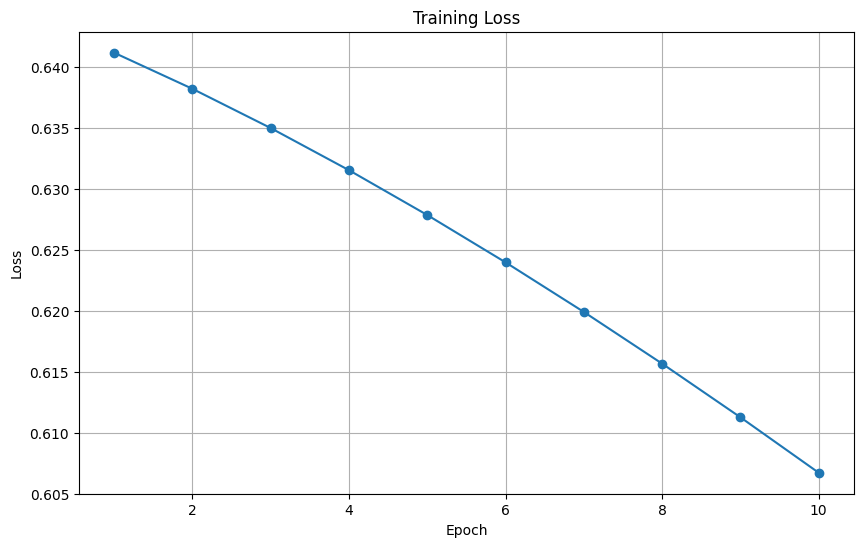

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), epoch_losses, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)
plt.show()

In [ ]:
model.eval()

SimpleRNNModel(
  (rnn): RNN(8, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=2, bias=True)
)

In [ ]:
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs.data, 1)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, predicted)
precision = precision_score(y_test, predicted, average='weighted')
recall = recall_score(y_test, predicted, average='weighted')
f1 = f1_score(y_test, predicted, average='weighted')


In [ ]:
print(f'Accuracy: {accuracy:.4f} \n Precision: {precision:.4f} \n Recall: {recall:.4f} \n F1: {f1:.4f}')

Accuracy: 0.8000 
 Precision: 0.7937 
 Recall: 0.8000 
 F1: 0.7867
